In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation

from tqdm import tqdm

In [2]:
def f(x):
    return (x-1)**2

In [3]:
def Df(x,f,h=0.001):
    
    d = (f(x+h) - f(x-h))/(2*h)
    
    return d

In [4]:
x = np.linspace(-1,4,20)
y = f(x)
dy = Df(x,f)

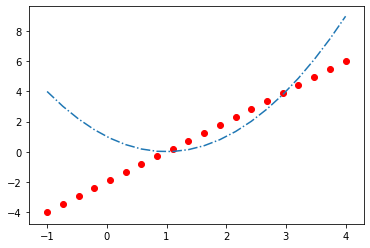

In [5]:
plt.plot(x,y,'-.')
plt.scatter(x,dy,color='r')

$$ x_{n+1} = x_{n} - \gamma\nabla F(x_{n}) $$

In [6]:
gamma = 0.01 # Learning rate

Epochs = 5
Steps = 100

Vector = np.zeros((Epochs,Steps))

for i in range(Epochs):
    
    x0 = np.random.uniform(-10,10)
    #print(x0)
    
    for j in range(Steps):
        
        Vector[i,j] = x0;
        x0 += -gamma*Df(x0,f)

In [7]:
print(Vector[:,-1])

[0.84956922 0.92378744 1.61763959 1.94887881 1.92035027]


In [8]:
MinV = Vector[:,-1]
ii = np.argmin(f(MinV))
print(ii)
print(MinV[ii])

1
0.9237874408462557


# Hagamos el caso 2D

$$f(x,y) = x^{4} + y^{4} - 2(x-y)^{2}$$

In [9]:
def f2(x,y):
    return x**4 + y**4 - 2*(x-y)**2
    #return x**4+y**4 - x*y**3

In [10]:
x = np.linspace(-3,3,30)
y = np.linspace(-3,3,30)

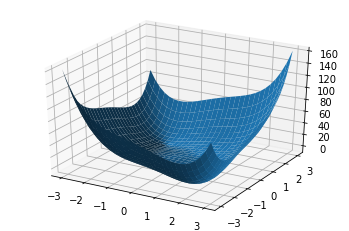

In [11]:
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')

ax.plot_surface(X,Y,Z)

In [12]:
def Dfx(x,y,f, h= 0.001):
    
    d = (f(x+h,y) - f(x-h,y))/(2*h)
    
    return d

def Dfy(x,y,f, h= 0.001):
    d = (f(x,y+h) - f(x,y-h))/(2*h)
    return d

In [13]:
gamma = 0.01

Epochs = 60
Steps = 50
limites = 3

VectorFinal = []

for i in range(Epochs):
    
    x0 = np.random.uniform(-limites,limites)
    y0 = np.random.uniform(-limites,limites)
    
    PointsX = []
    PointsY = []
    
    for j in range(Steps):
        
        PointsX.append(x0)
        PointsY.append(y0)
        
        x0 += -gamma*Dfx(x0,y0,f2)
        y0 += -gamma*Dfy(x0,y0,f2)
        
    
    VectorFinal.append([PointsX,PointsY])

In [14]:
UltimoX = np.zeros((Epochs))
UltimoY = np.zeros((Epochs))

for i in range(Epochs):
    UltimoX[i] = VectorFinal[i][0][-1]
    UltimoY[i] = VectorFinal[i][1][-1]

In [15]:
print(UltimoX)
print(UltimoY)

[-1.41427386  0.41242826 -0.77566465 -0.41024473 -0.40289444  1.41384407
  1.4098392   1.41421753  1.41412322 -1.41391355  1.41423477 -1.41426365
 -0.44491601  0.78034705 -1.41137614 -1.41126014  1.41316389  1.32268506
 -1.41425968 -1.4141126  -1.41426653  1.41339893 -1.41421952 -1.25576399
  1.41402952 -1.40972715 -1.41427807 -1.41401505  0.94139206  1.41399869
  0.43380912  1.41358475 -1.29597227 -1.41427996  1.41414782  1.41415862
  1.41422829  1.16313306  1.41427156 -1.41372739 -0.92744609  1.41248174
  1.41404647  1.4142832  -1.41264362 -1.4131734   1.41422987 -1.40033656
  1.41423982  1.4140135   0.26411297  1.41428144 -1.12110127 -0.42669094
 -1.4142347   1.40926676  1.41374582 -1.41421607  1.4141535  -1.41360547]
[ 1.41426895  0.55978169  1.13524236 -0.56121468 -0.56769601 -1.41389548
 -1.41030464 -1.41421541 -1.41412726  1.41395558 -1.414232    1.41425953
 -0.52479355  0.05126453  1.41133686  1.41121078 -1.41317789 -1.28084421
  1.41425638  1.41412424  1.41426235 -1.41344151  

In [16]:
Minimos = np.zeros((Epochs))

for i in range(Epochs):
    Minimos[i] = f2(UltimoX[i],UltimoY[i])

In [17]:
print(Minimos)

[-7.99999995  0.08369864 -5.28020013  0.0819423   0.07589354 -7.99999809
 -7.99972506 -8.         -7.99999988 -7.99999874 -7.99999999 -7.99999996
  0.10227318 -0.69230596 -7.99986965 -7.99985838 -7.99998262 -7.80455057
 -7.99999997 -7.99999985 -7.99999996 -7.99998992 -8.         -7.28091473
 -7.99999953 -7.99968203 -7.99999994 -7.99999942 -6.08529847 -7.99999936
  0.09795569 -7.99999381 -7.81144568 -7.99999994 -7.99999993 -7.99999995
 -8.         -6.9573945  -7.99999995 -7.99999659 -6.22774315 -7.99995864
 -7.9999996  -7.99999993 -7.99996625 -7.99998309 -8.         -7.99652685
 -7.99999999 -7.99999944 -0.1161803  -7.99999993 -5.4379322   0.09369375
 -7.99999999 -7.99967596 -7.99999659 -8.         -7.99999995 -7.99999487]


In [18]:
ii = np.argmin(Minimos)

In [19]:
MejorEpoca = int(ii)
print(MejorEpoca)

57


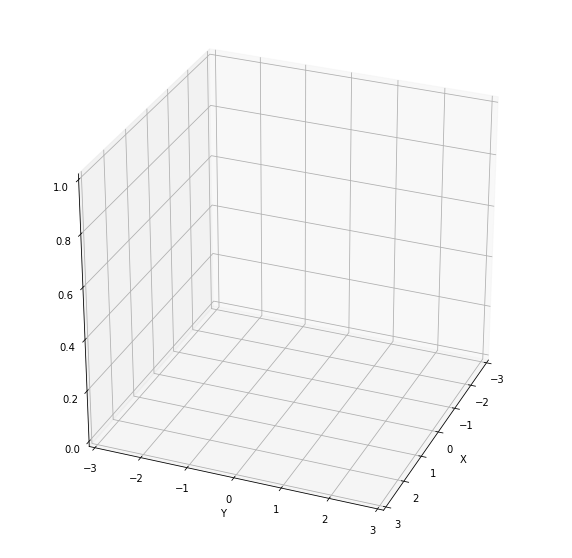

In [20]:
Nframes = len(VectorFinal[0][0]) 

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 29, azim = 22)

x1 = np.linspace(-3,3,30)
y1 = np.linspace(-3,3,30)
X1,Y1 = np.meshgrid(x1,y1)
Z1 = f2(X1,Y1)


def init():
    
    ax.set_xlim3d(-3.,3.)
    ax.set_ylim3d(-3.,3.)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    
def animate(i,e):
    
    plot = ax.clear()
    init()
       
    x = VectorFinal[e][0]
    y = VectorFinal[e][1]


    plot = ax.plot_surface(X1, Y1, Z, cmap=cm.coolwarm, alpha=0.4)
    plot = ax.scatter(x[i], y[i], f2(x[i],y[i]),marker='o',color='r') 

   
    return plot

#Animation = animation.FuncAnimation(fig, animate, frames=Nframes, fargs=(E,),init_func=init)

e = MejorEpoca
Animation = animation.FuncAnimation(fig, animate, frames=Nframes, fargs=(e,),init_func=init)

# Vamos a crear una Neurona y la vamos a entrenar para que funcione como una compuerta tipo And

# Activacion de la neurona
$$ f(z) = \frac{1}{1+e^{-z}}$$

$$ \vec{a}^{L} = f(z) = f( \vec{b} + \vec{W}\cdot \vec{X}  ) $$

$$ C = \frac{1}{2}(a^{L}-y_{i})^{2} $$

$$ \frac{\partial C}{\partial w} = \frac{\partial C}{\partial a} \frac{\partial a}{\partial z}\frac{\partial z}{\partial w} = (a-y_{i})\frac{\partial a}{\partial z} x_{i} $$

$$ \frac{\partial C}{\partial b} = \frac{\partial C}{\partial a} \frac{\partial a}{\partial z}\frac{\partial z}{\partial b} = (a-y_{i})\frac{\partial a}{\partial z} $$

In [21]:
sigm = lambda x: 1/(1+np.exp(-x))
dsigm = lambda x: x*(1-x)

In [40]:
class Neuron():
    
    def __init__(self, NConnections, NNeurons, ActivationFunc, DActivation):
        
        self.ActivationFunc = ActivationFunc
        self.DActivation = DActivation
        
        self.b = np.random.rand(1,NNeurons)*2 - 1
        
        self.W = np.random.rand(NConnections,NNeurons)*2 -1
        
        self.Connections = NConnections
        self.Neuron = NNeurons
        
    def Predict(self, Input, train = False):
        
        output = []
        
        z = self.b + np.dot( Input, self.W )
        
        a = self.ActivationFunc(z)
        
        output.append((z,a))
        
        if train:
            return output
        else:
            return output[0]
        
    def Train(self, XTrain, YTrain, lr=0.5):
        
        out = self.Predict(XTrain, train=True)
        
        z = out[0][0]
        a = out[0][1]
        
        # Gradiente
        delta = (a-YTrain)*self.DActivation(a[0][0])
        
        self.b -= lr*delta[0]
        
        self.W[0] -= lr*delta[0]*XTrain[0]
        self.W[1] -= lr*delta[0]*XTrain[1]
        
        return 0.5*(a-YTrain)**2

In [51]:
# Vamos a crear una capa
N0 = Neuron(2,1,sigm,dsigm)

In [52]:
N0.W

array([[-0.03994946],
       [-0.91336096]])

In [53]:
N0.Predict([1,1])

(array([[-0.34570538]]), array([[0.41442424]]))

In [54]:
#OR La Data
XTrain = np.array([[1,1],[1,0],[0,1],[0,0]])
YTrain = np.array([[1.],[0.],[0.],[1.]])

Ndata = len(XTrain)

Act = N0.Predict(XTrain[0])
print(Act[1])

[[0.41442424]]


In [55]:
Cost =[]
x = []
for e in tqdm(range(50000)):
    
    CostI = []
    
    for i in range(len(XTrain)):
        
        out = N0.Train(XTrain[i],YTrain[i])
        CostI.append(out[0])
        
    Cost.append(np.average(CostI))
    x.append(e)

100%|██████████| 50000/50000 [00:06<00:00, 8314.90it/s]


In [28]:
#print(Cost)

Text(0, 0.5, 'Cost')

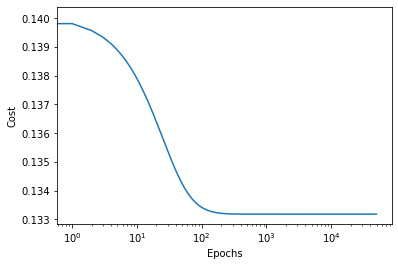

In [56]:
plt.plot(x,np.array(Cost))
plt.xscale('log')
plt.xlabel('Epochs')
plt.ylabel('Cost')

In [57]:
out = N0.Predict(XTrain)
print(np.round(out[1],1))

[[0.5]
 [0.5]
 [0.5]
 [0.5]]


In [58]:
N0.W

array([[-6.44463106e-02],
       [-2.91433544e-16]])

In [59]:
N0.b

array([[3.74700271e-16]])